### load derived data (json file) into pandas

- load dataDict downloaded from WOS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jsonlines
import doi as doiLib
from unpywall.utils import UnpywallCredentials
from unpywall import Unpywall

In [3]:
with open("email") as fid:
    unpaywallcred = fid.readline()

UnpywallCredentials("nick.haupka@gmail.com")# could not get api cred on time, so using this email which is pasted all over the web.... #unpaywallcred)


Your email has been set.

In [4]:
dataPath = "../data/derived2/"
dataFile = "records.jsonl"

In [11]:
index = 0

#initialData = pd.DataFrame()
dataDict = {"WOSUID":[],
            "pubTitle":[],
            "pubYear":[],
            "pubType":[],
            "journalTitle":[],
            "publisher":[],
            "area":[],
            "areaCount":[],
            "identifier":[],
            "keywords":[],
            "abstract":[],
            "doi":[],
            "validDoi":[],
            "url":[],
            #"OA":[],
            #"OA-pdf_url":[],
            #"issn":[],
                   }
with jsonlines.open(dataPath+dataFile) as reader:   
    for obj in reader:
        if index<100000:
            try:
                wosID = obj["record"]["UID"][4:]
            except KeyError:
                wosID = None
            dataDict["WOSUID"].append(wosID)
            dataDict["pubTitle"].append(obj["record"]["static_data"]["summary"]["titles"]["title"][-1]["content"])
            dataDict["pubYear"].append(obj["record"]["static_data"]["summary"]["pub_info"]["pubyear"])
            dataDict["pubType"].append(obj["record"]["static_data"]["summary"]["doctypes"]["doctype"])
            dataDict["journalTitle"].append(obj["record"]["static_data"]["summary"]["titles"]["title"][0]["content"])
               
            try:
                publisher = obj["record"]["static_data"]["summary"]["publishers"]["publisher"]["names"]["name"]["unified_name"]
            except KeyError:
                publisher = None
                
            dataDict["publisher"].append(publisher)
            try:
                areaCount = obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]["count"]
                
            except KeyError:
                areaCount = None
            dataDict["areaCount"].append(areaCount)
            
            try:
                area = obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]["subheading"]
                
            except KeyError:
                area = None
            dataDict["area"].append(area)
            
            dataDict["identifier"].append(obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"])
            
            try:
                keyword = obj["record"]["static_data"]["fullrecord_metadata"]["keywords"]["keyword"]
            except KeyError:
                keyword = None
            dataDict["keywords"].append(keyword)

            try:
                abstract = obj["record"]["static_data"]["fullrecord_metadata"]["abstracts"]["abstract"]["abstract_text"]["p"]
            except KeyError:
                abstract = None
            
            dataDict["abstract"].append(abstract)
            

            #doi = None
            #url = None
            #print(index)
            for item in obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"]:
                try:
                    if item["type"]=="doi" or item["type"]=="xref_doi":    
                        doi = item["value"]
                except TypeError:
                    doi=None
                
                try:
                    validDoi = doiLib.validate_doi(doi)
                except ValueError:
                    validDoi = None
            dataDict["doi"].append(doi)
            dataDict["validDoi"].append(validDoi)
            
            if validDoi !=None:
                pass
            else:
                pass    
            try:
                url = doiLib.get_real_url_from_doi(doi)
            except ValueError:
                url=None
            dataDict["url"].append(url)
            




            
        index=index+1


In [61]:
#convert dictionary to panda dataframe
data = pd.DataFrame.from_dict(dataDict)


In [64]:
#use unpaywall api to check if papers are open access
upArticles = Unpywall.doi(dois=list(data["doi"].dropna()),errors="ignore")             



C:\ProgramData\Miniconda3\lib\site-packages\unpywall\cache.py:203: UserWarning: Could not download doi: 10.1145.2556288.2557132
  warnings.warn('Could not download doi: {}'.format(doi))
C:\ProgramData\Miniconda3\lib\site-packages\unpywall\cache.py:203: UserWarning: Could not download doi: 10.3233/978-1-61499-393-3-124
  warnings.warn('Could not download doi: {}'.format(doi))
C:\ProgramData\Miniconda3\lib\site-packages\unpywall\cache.py:203: UserWarning: Could not download doi: 10.3233/978-1-61499-484-8-631
  warnings.warn('Could not download doi: {}'.format(doi))
C:\ProgramData\Miniconda3\lib\site-packages\unpywall\cache.py:203: UserWarning: Could not download doi: 10.18690/18557147.7.2.139-159(2015)
  warnings.warn('Could not download doi: {}'.format(doi))
C:\ProgramData\Miniconda3\lib\site-packages\unpywall\cache.py:203: UserWarning: Could not download doi: 10.1504/IJSNET.2016.076858
  warnings.warn('Could not download doi: {}'.format(doi))
C:\ProgramData\Miniconda3\lib\site-packages

In [73]:
#merge information based on doi
##TODO
#dataMerge = pd.merge(data, upArticles, on='doi')


    
#'best_oa_location.license'
#df["OA"] = up["is_oa"]
#df["OA-pdf_url"] = up["best_oa_location.url_for_pdf"]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [72]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
 

2601


<AxesSubplot:xlabel='pubYear', ylabel='Count'>

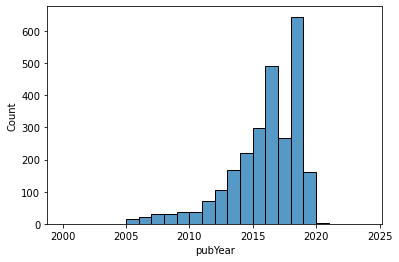

In [71]:
print(len(data))
sns.histplot(data["pubYear"],bins=list(range(2000,2025)))

In [16]:
#identifier
#obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"]

#WOSID 
#obj["record"]["UID"][4:]

#'find if this is an article
#obj["record"]["static_data"]["summary"]["doctypes"]["doctype"]

#find publication title
#obj["record"]["static_data"]["summary"]["titles"]["title"][-1]["content"]

#find journal title
#obj["record"]["static_data"]["summary"]["titles"]["title"][0]["content"]

#find publisher (elsevier, nature, etc)
#obj["record"]["static_data"]["summary"]["publishers"]["publisher"]["names"]["name"]["unified_name"]

#get publication year
#obj["record"]["static_data"]["summary"]["pub_info"]["pubyear"]

#find area (still requires more code to systematically extract all categories)
#obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]

### plot for the paper:
- number of papers in OSH over years
  - divide them per area (using research areas tags)
    - Engineering, life sciences, humanities?
- quality of the papers - how many fit the OSHWA OSH classification?
- Accessibility of the papers - how many are OA?